### CASA0002_Urban simulation
# London tube network analysis
---

Elsa Arcaute, Carlos Molinero, Valentina Marin, Mateo Neira 

February 2023


This code will enable you to convert the tube network into a graph and then we will compute some measures of centrality.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

## 1. Constructing the networks

We are going to use the tube network file called "london_tubenetwork.graphml". This file has everything we need to construct the graph. A __graphml__ is a format that describes the structural properties of a graph. 

In [2]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london_tubenetwork.graphml')

In [3]:
type(G)

networkx.classes.graph.Graph

In [11]:
# list all operations, methods, attributes of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

78
copy
__sizeof__
is_multigraph
__init__
graph
size
__module__
remove_node
adjlist_inner_dict_factory
graph


In [12]:
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [13]:
# compute the density of the spatial network
print(G.is_directed()) 
print(G.number_of_edges() / ((G.number_of_nodes() * (G.number_of_nodes() - 1)) / 2))
print(nx.density(G))

False
0.005078210714397667
0.005078210714397667


In [28]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': '(534825.0140298002, 183290.813466997)'})

In [29]:
# since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    

In [30]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [31]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1'})

In [32]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [43]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

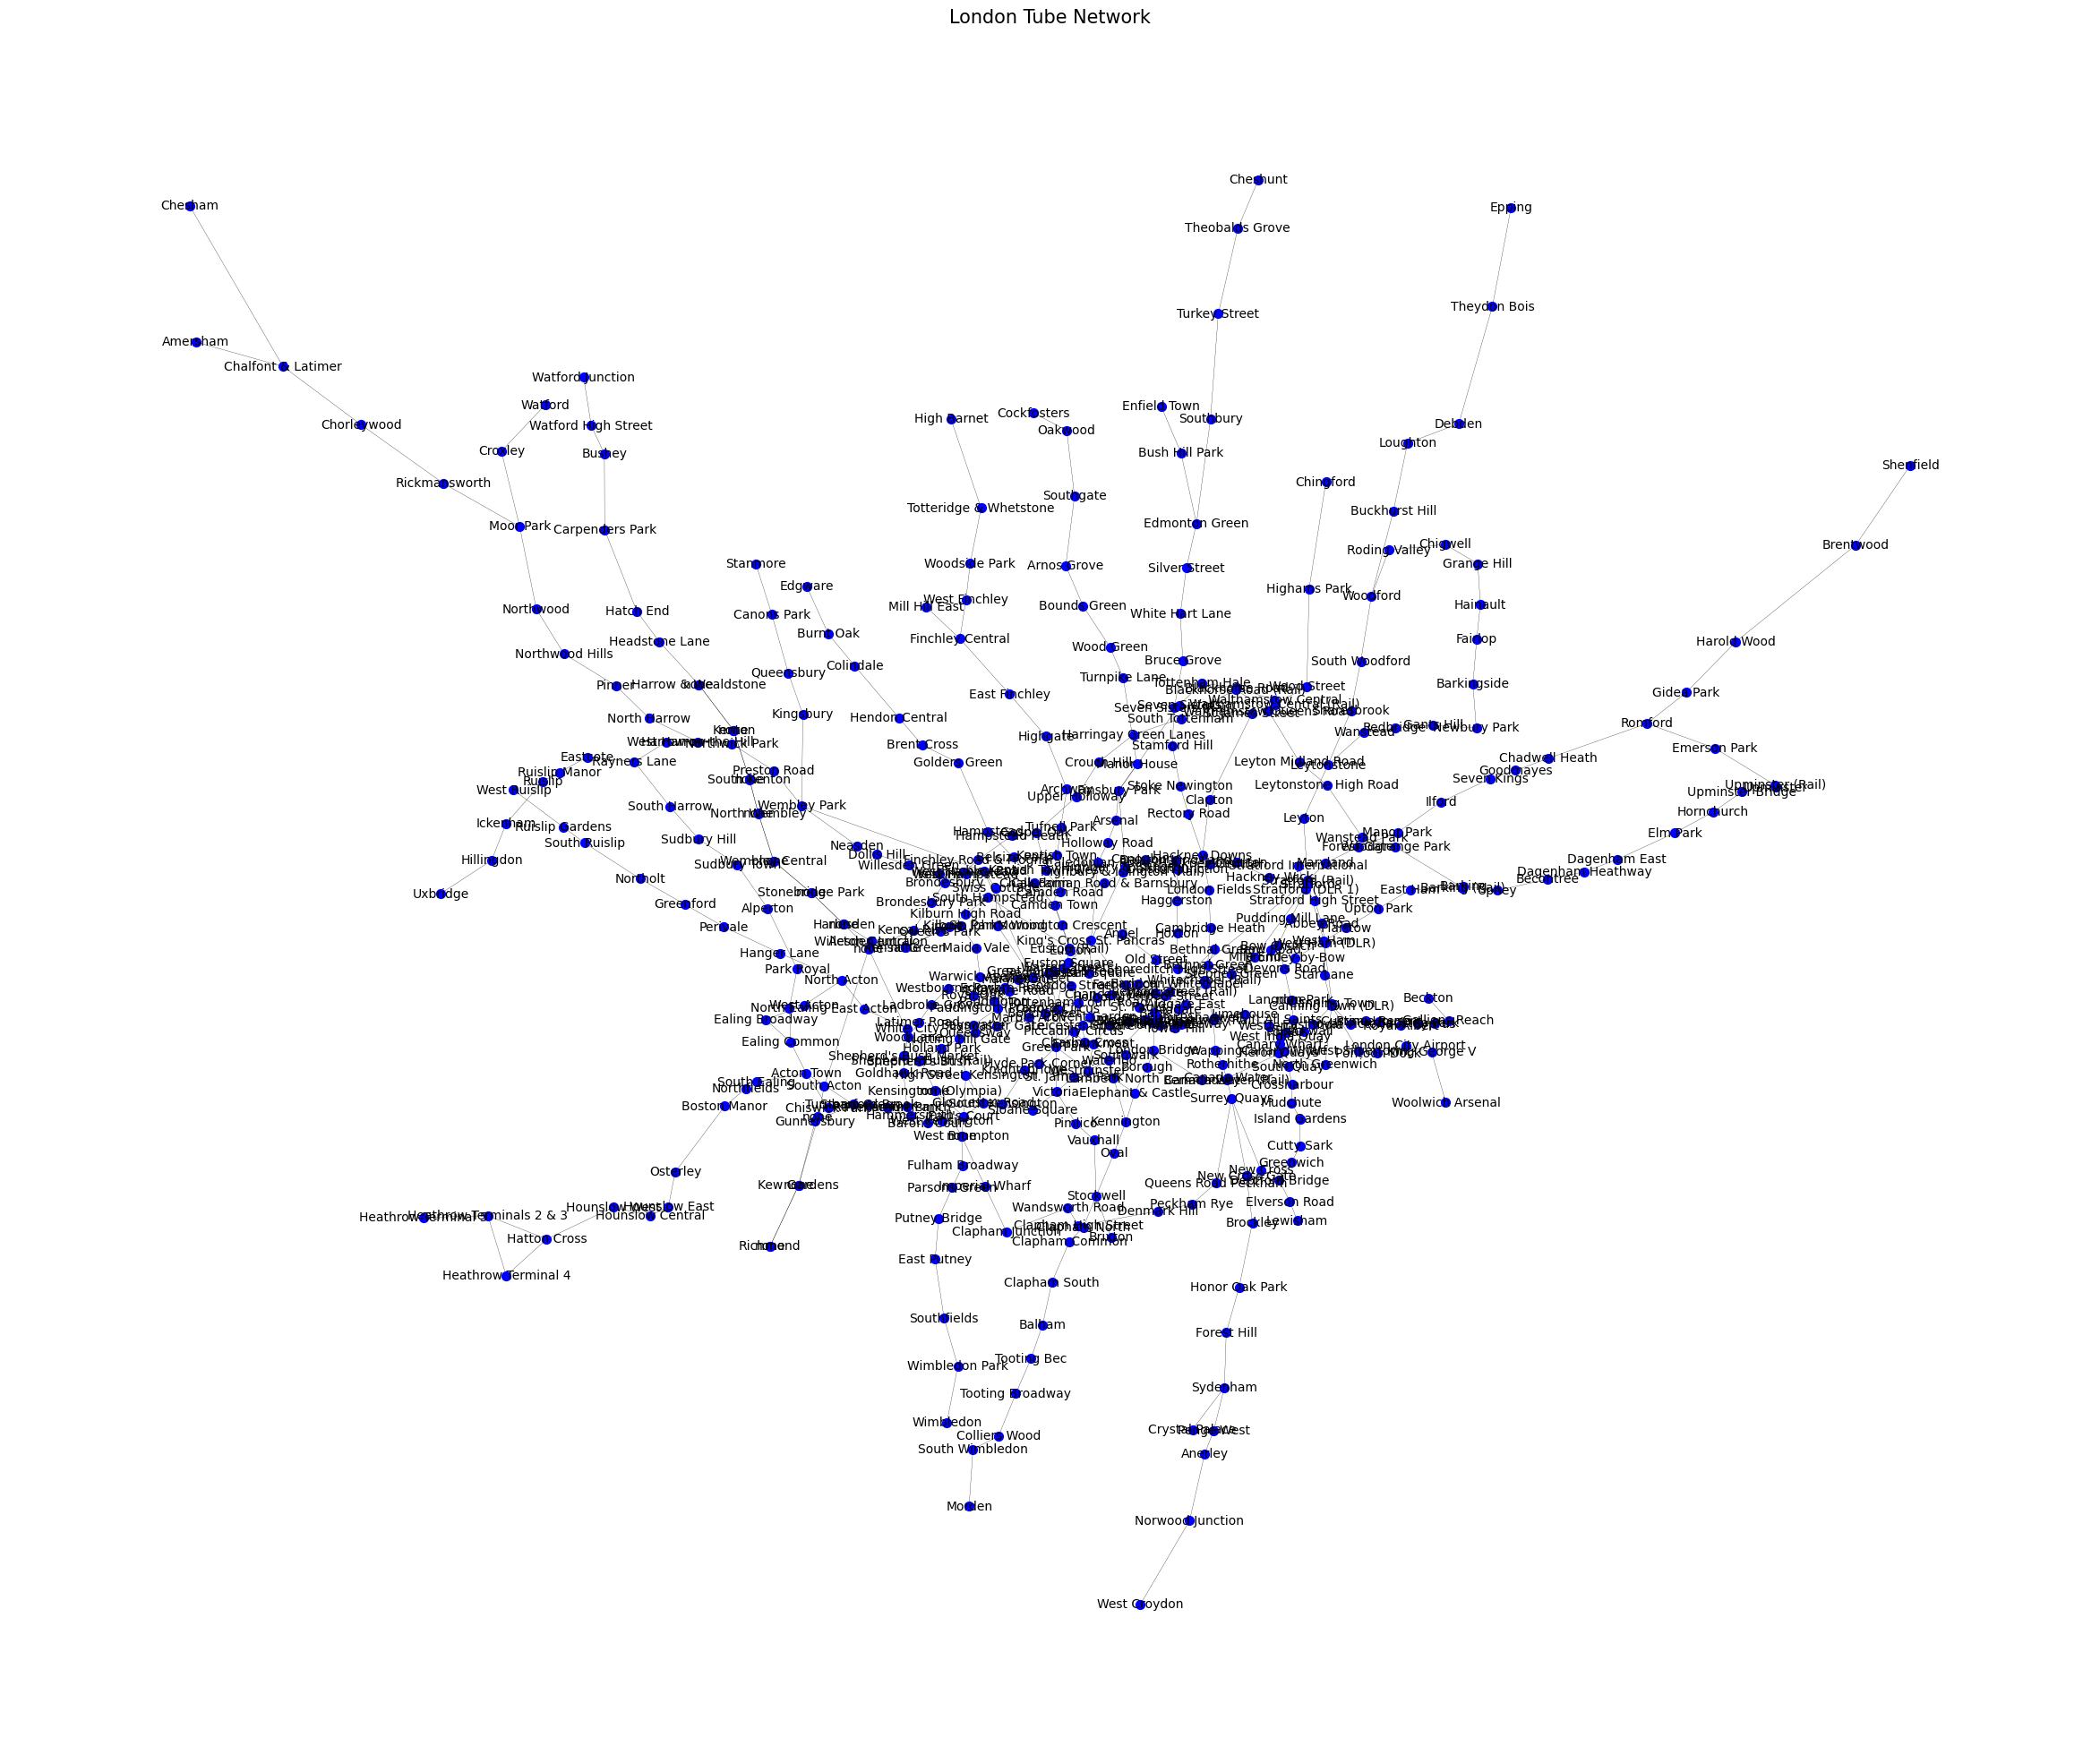

In [46]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(30,25))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London Tube Network",fontsize=15)
plt.axis("off")
plt.show()


In [47]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_id,station_1_,name,length,station_2_
0,910GCAMHTH,910GBTHNLGR,LeaValleyLine1,Cambridge Heath,London Overground,1076.082201,Bethnal Green
1,910GCAMHTH,910GLONFLDS,LeaValleyLine2,Cambridge Heath,London Overground,970.949720,London Fields
2,910GBTHNLGR,910GLIVST,LivStBeth,Bethnal Green,London Overground,1813.304143,Liverpool Street (Rail)
3,910GBTHNLGR,940GZZLUBLG,NaN,Bethnal Green,NaN,481.514661,Bethnal Green
4,910GLONFLDS,910GHAKNYNM,LeaValleyLine3,London Fields,London Overground,917.502798,Hackney Downs
5,910GHAKNYNM,910GRCTRYRD,LeaValleyLine4,Hackney Downs,London Overground,1178.231752,Rectory Road
6,910GHAKNYNM,910GCLAPTON,ChingfordSpur1,Hackney Downs,London Overground,1432.298268,Clapton
7,910GRCTRYRD,910GSTKNWNG,LeaValleyLine5,Rectory Road,London Overground,775.442407,Stoke Newington
8,910GSTKNWNG,910GSTMFDHL,LeaValleyLine6,Stoke Newington,London Overground,1200.722885,Stamford Hill
9,910GSTMFDHL,910GSEVNSIS,LeaValleyLine7,Stamford Hill,London Overground,1001.203674,Seven Sisters (Rail)


## 2.  Exploring the network:

In [59]:
# if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
# this distance in given in meters

7113.318903338077

In [60]:
# if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('940GZZLUWYP', '940GZZLUFYR'),
 {'length': 7113.318903338077,
  'name': 'Metropolitan',
  'line_id': 'MetJub7',
  'station_1_': 'Wembley Park',
  'station_2_': 'Finchley Road'})

In [62]:
#different ways to check the name of stations which are further away from each other: query the edges properties vs the nodes properties
%time furthest_stat = [(d['station_1_'],d['station_2_']) for  u, v, d in G.edges(data=True) if d['length'] == max_dist]
%time furthest_stat = [(G.nodes[u]['station_name'], G.nodes[v]['station_name']) for u, v, w in G.edges(data='length') if w==max_dist] 
furthest_stat

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 1.05 ms


[('Wembley Park', 'Finchley Road')]

In [66]:
#if want to know to which stations Baker Street is directly connected to

Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
Baker_Street

[('Edgware Road', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Bond Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [68]:
#if want to know to which stations Baker Street is directly connected to but we don't know if is written with the space 

Baker = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Edgware Road', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Bond Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [69]:
#if want to know the edges connecting Baker Street station:

Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('940GZZLUERC',
  '940GZZLUBST',
  {'length': 926.5120326980218,
   'name': 'Hammersmith & City',
   'line_id': 'CircHamEdgware',
   'station_1_': 'Edgware Road',
   'station_2_': 'Baker Street'}),
 ('940GZZLUBST',
  '940GZZLUGPS',
  {'length': 821.2655270015941,
   'name': 'Circle',
   'line_id': '3LineNorth1',
   'station_1_': 'Baker Street',
   'station_2_': 'Great Portland Street'}),
 ('940GZZLUBST',
  '940GZZLUBND',
  {'length': 1667.851258389804,
   'name': 'Jubilee',
   'line_id': 'JubileeEastB',
   'station_1_': 'Baker Street',
   'station_2_': 'Bond Street'}),
 ('940GZZLUBST',
  '940GZZLUSJW',
  {'length': 2135.320836057866,
   'name': 'Jubilee',
   'line_id': 'JubileeEastC',
   'station_1_': 'Baker Street',
   'station_2_': "St. John's Wood"}),
 ('940GZZLUBST',
  '940GZZLUFYR',
  {'length': 3279.580795521362,
   'name': 'Metropolitan',
   'line_id': 'MetJub8',
   'station_1_': 'Baker Street',
   'station_2_': 'Finchley Road'}),
 ('940GZZLUBST',
  '940GZZLUMYB',
  {'length': 

In [73]:
# topological diameter of the network，number of edges in the longest path
topo_diameter = nx.diameter(G)
# weighted diameter of the network, sum of the length of the edges in the longest path
weighted_diameter = nx.diameter(G,weight='length')
print(f'Topological diameter: {topo_diameter}\nWeighted diameter: {weighted_diameter}')


Topological diameter: 47
Weighted diameter: 76998.62487685519


In [74]:
# diameter of the network considering the distance between stations (weighted diameter)
nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

76998.62487685519

In [75]:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [78]:
#to check how many tubelines are there & how many stations are in each line
lines = [d['lines'].split(", ") for n, d in G.nodes(data=True)]
lines
flat_lines = [item for sublist in lines for item in sublist]
flat_lines

# count unique names in the list
from collections import Counter
lines_count = Counter(flat_lines)
lines_count

Counter({'London Overground': 111,
         'National Rail': 60,
         'District': 60,
         'Piccadilly': 53,
         'Northern': 50,
         'Central': 49,
         'DLR': 45,
         'Circle': 36,
         'Metropolitan': 36,
         'Hammersmith & City': 29,
         'Jubilee': 27,
         'Bakerloo': 25,
         'Crossrail': 18,
         'Victoria': 16,
         'lines': 16,
         'TfL Rail': 14,
         'Crossrail 2': 11,
         'East London': 8,
         'Waterloo & City': 2})

## 3.  Centrality measures

#### Degree Centrality on nodes:

In [80]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [81]:
#retrieve the degree centrality of the node
G.nodes['940GZZLUBST']['degree']

0.016018306636155607

In [83]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUECT,Earl's Court,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZLUWHM,West Ham,0.011442
910GWLSDJHL,none,0.011442


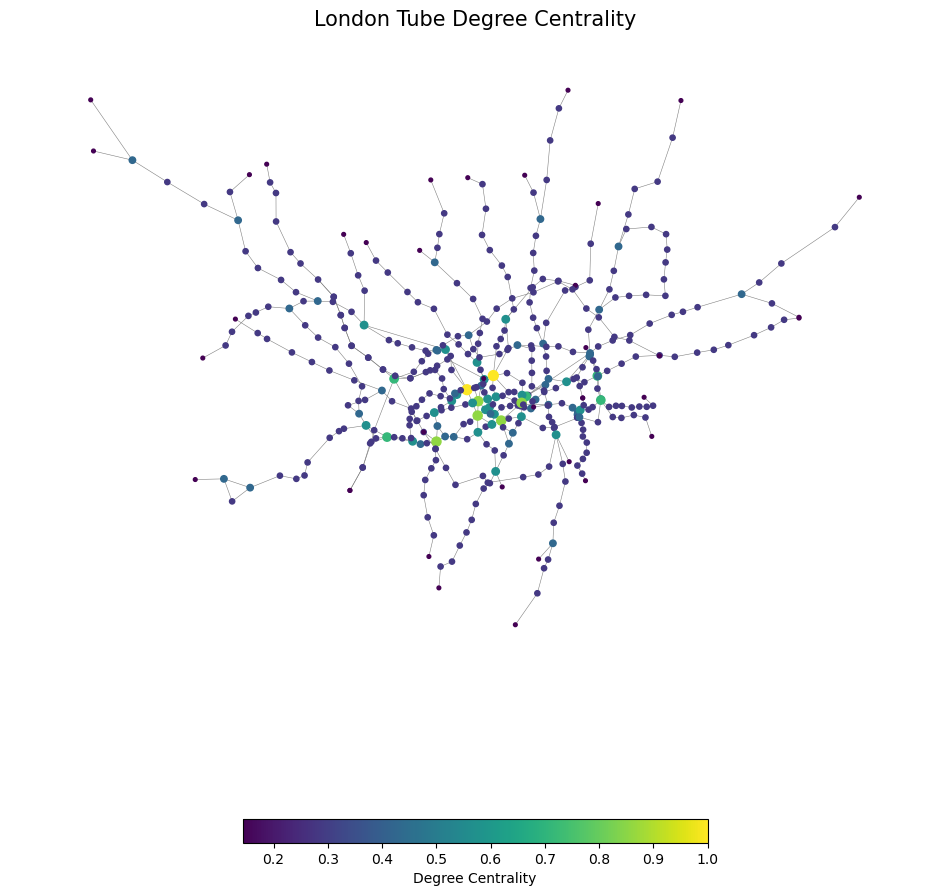

In [84]:
# Lets set colour and size of nodes according to degree centrality values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Degree Centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [85]:
### Weighted betweenness centrality:
# Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [86]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
940GZZLUBST,Baker Street,36734.0
940GZZLUFYR,Finchley Road,29786.0
940GZZLULVT,Liverpool Street,25752.0
910GWHMDSTD,West Hampstead,25747.0
940GZZLUWHP,West Hampstead,25686.0
940GZZLUKSX,King's Cross St. Pancras,24628.0
940GZZLUBNK,Bank,21087.0
940GZZLUMED,Mile End,17759.0
940GZZLUOXC,Oxford Circus,17317.0
910GBTHNLGR,Bethnal Green,17211.0


In [88]:
# set as an attribute of the edges
bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# invert the lengths and also set as an attribute of the edges
nx.set_edge_attributes(G, {(u, v): 1/d['length'] for u, v, d in G.edges(data=True)}, 'inverted_length')
bet_london_w=nx.betweenness_centrality(G,weight='inverted_length',normalized=False)
nx.set_node_attributes(G,bet_london_w,'betweenness_w_inv')

df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df['betweenness_w_inv'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w_inv'))

df_sorted = df.sort_values(["betweenness_w_inv"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w,betweenness_w_inv
940GZZLUBNK,Bank,21087.0,37917.0
940GZZLUBLG,Bethnal Green,16402.0,35281.0
940GZZLUGPK,Green Park,6414.0,34570.0
940GZZLUWLO,Waterloo,9738.0,31053.0
940GZZLULVT,Liverpool Street,25752.0,30609.0
940GZZLUBST,Baker Street,36734.0,28657.0
910GBTHNLGR,Bethnal Green,17211.0,27963.0
940GZZLUWSM,Westminster,7366.0,27543.0
940GZZLUFYR,Finchley Road,29786.0,23878.0
910GSTFD,Stratford (Rail),9881.0,21357.0


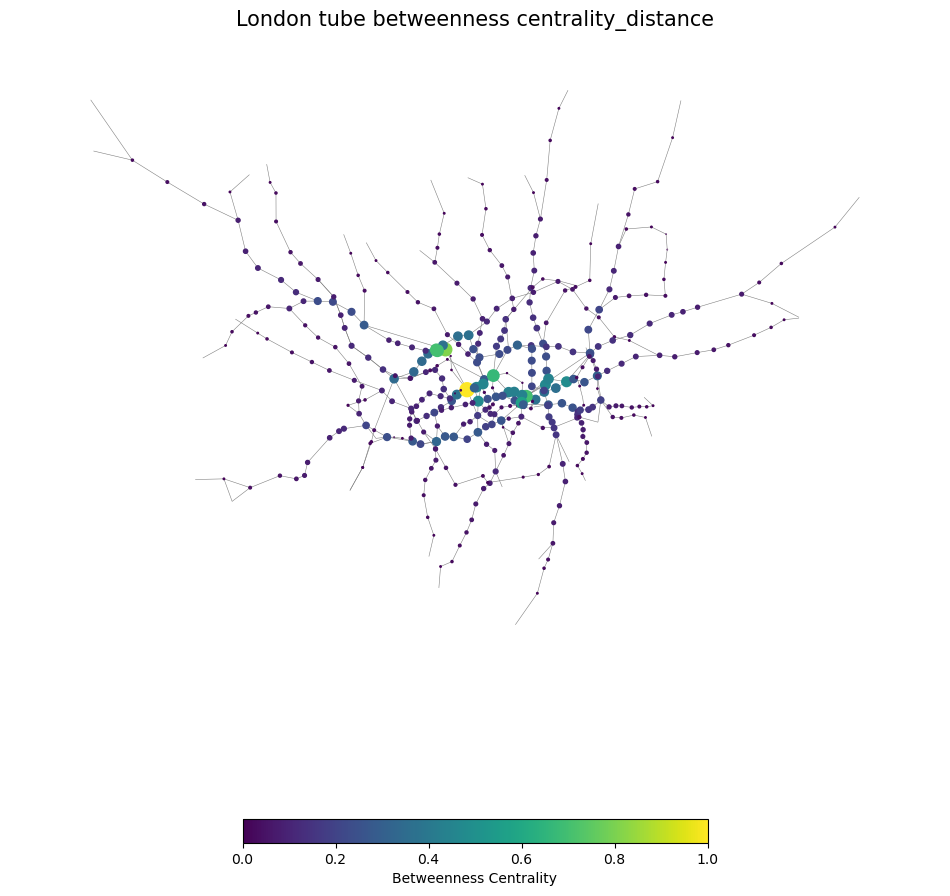

In [89]:
# Lets set colour and size of nodes according to betweenness values（weighted by the distance）
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality_distance",fontsize=15)
plt.show()

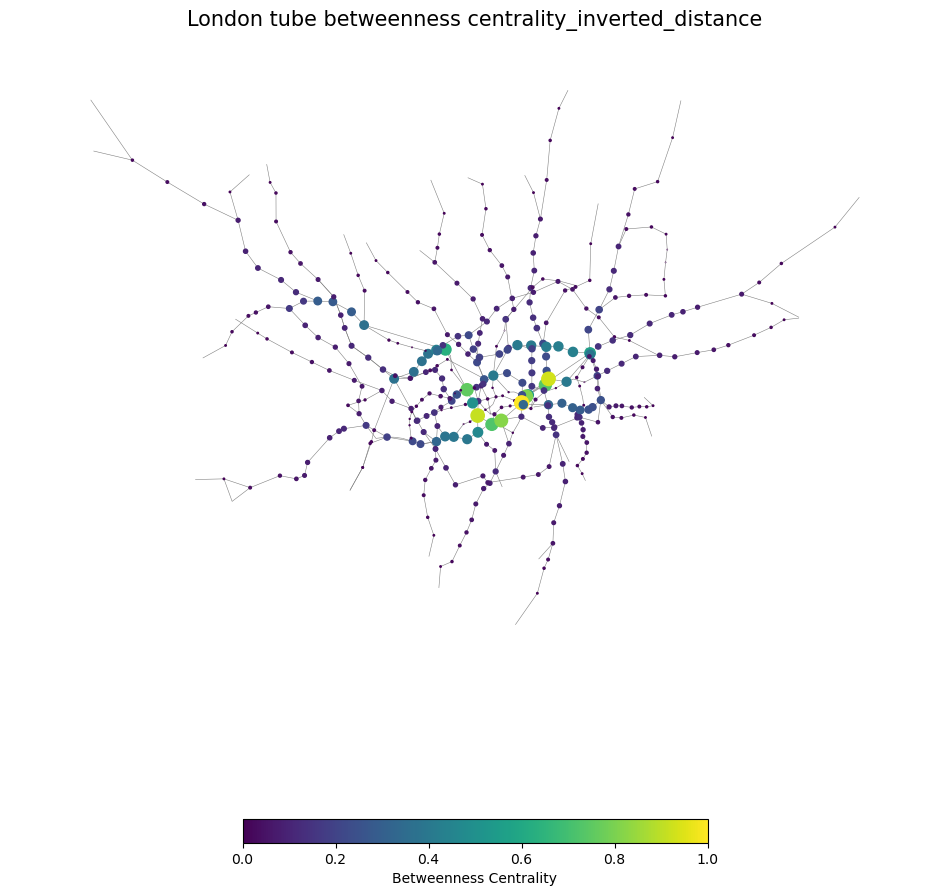

In [90]:
# Lets set colour and size of nodes according to betweenness values（weighted by the inverse of the length）
betweenness_w_values=[(i[1]['betweenness_w_inv']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w_inv']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w_inv']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality_inverted_distance",fontsize=15)
plt.show()

In [91]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


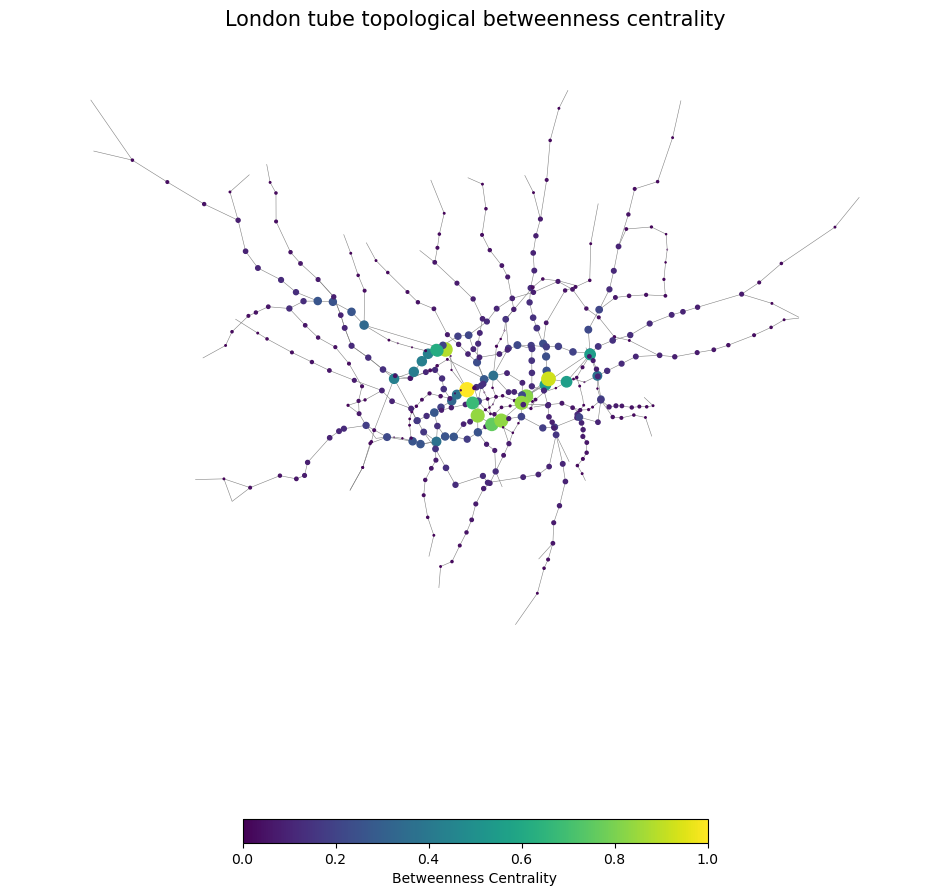

In [92]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on the edges:

In [93]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G, normalized=False, weight='length')
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

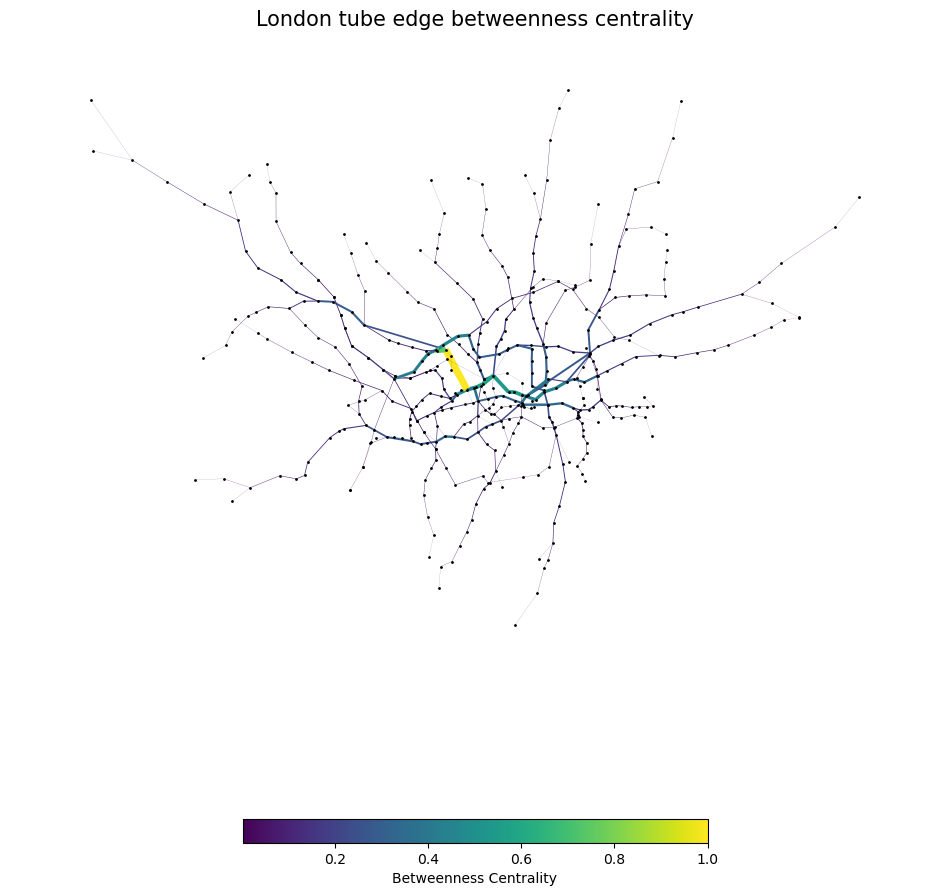

In [94]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube edge betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [117]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
940GZZLUOXC,Oxford Circus,0.000073
940GZZLUTCR,Tottenham Court Road,0.000073
940GZZLUBST,Baker Street,0.000072
940GZZLUHBN,Holborn,0.000072
940GZZLUBND,Bond Street,0.000072
940GZZLURGP,Regent's Park,0.000072
940GZZLUPCC,Piccadilly Circus,0.000072
940GZZLUKSX,King's Cross St. Pancras,0.000072
940GZZLULSQ,Leicester Square,0.000071
940GZZLUGPS,Great Portland Street,0.000071


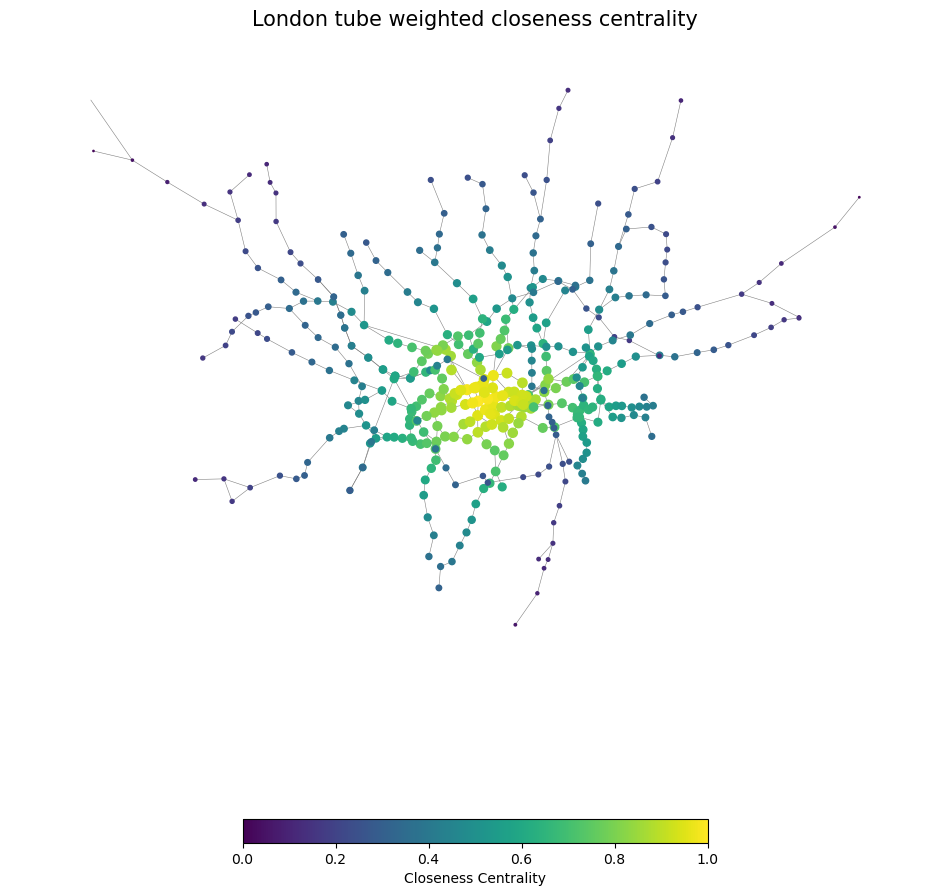

In [118]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [119]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


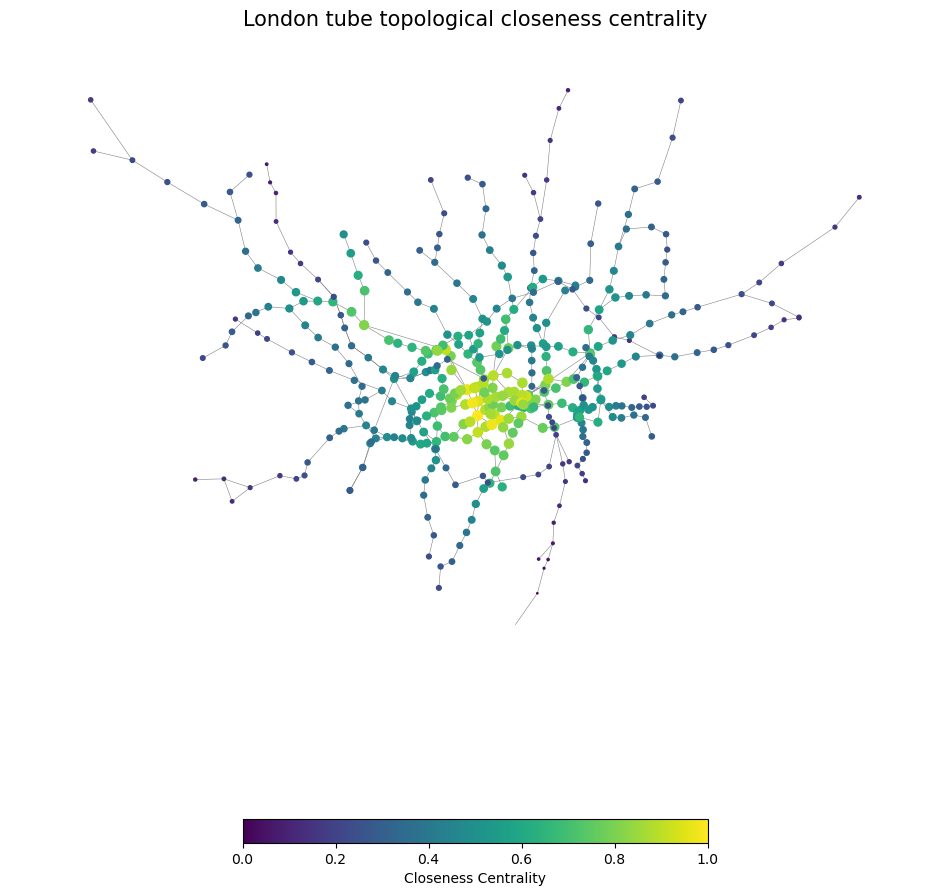

In [120]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

See this link for more centralities and their function in python:
https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [122]:
# number of connected components
nx.number_connected_components(G)

1

## 4.Explore the Influence of nodes:

Remove the node with the highest value according to one of the selected centralities in each. 
Then Critically think about the impact of the removal of nodes in the network according to the different centralities.

You may want to use some of the following codes: 

In [123]:
G2=G.copy()

In [129]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet=[n for n in G2.nodes() if G2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['940GZZLUBST']

In [132]:
# To check that node:
G2.nodes[(", ".join(maxbet))]['station_name']

#G2.nodes['940GZZLUBST']['station_name']

'Baker Street'

In [133]:
# Number of existing nodes:
l1=list(G2.nodes)
len(l1)

438

In [134]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G2.remove_nodes_from(maxbet)

In [135]:
# number of nodes after the removal
l2=list(G2.nodes)
len(l2)

437

In [136]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l2))
rem_nodes

['940GZZLUBST']

In [138]:
# To remove  10 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]
sorted_ten 

['940GZZLUBST',
 '940GZZLUBLG',
 '940GZZLUFYR',
 '940GZZLUBNK',
 '940GZZLUGPK',
 '940GZZLUWLO',
 '940GZZLULVT',
 '940GZZLUWSM',
 '940GZZLUBND',
 '910GWHMDSTD']

In [139]:
#Remove nodes:
G2.remove_nodes_from(sorted_ten)

In [140]:
# number of nodes after removal:
l3=list(G2.nodes)
len(l3)

428

In [141]:
# to check which is the one missing:
list(set(l2) - set(l3))

#Note that node '940GZZLUBST' is not in this list because it was alredy removed before, and we didnt create another copy for graph G

['940GZZLUFYR',
 '940GZZLUBND',
 '940GZZLULVT',
 '910GWHMDSTD',
 '940GZZLUBNK',
 '940GZZLUGPK',
 '940GZZLUWSM',
 '940GZZLUBLG',
 '940GZZLUWLO']

In [142]:
# Has the graph one component?
print(nx.is_connected(G2))

False


In [143]:
# number of connected components
nx.number_connected_components(G2)

3

In [144]:
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[121, 305, 2]

In [149]:

# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

305

In [150]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

69

# Quiz

In [250]:
#Let's re-load the graph so we can recalculate the measures ourselves

G_quiz = nx.read_graphml('london_tubenetwork.graphml')

#Convert coords from strings to tuples
for node in G_quiz.nodes():
    G_quiz.nodes[node]['coords'] = eval(G_quiz.nodes[node]['coords'])

#Add adjacent stations to edges
nod_name1={(e1,e2):(G_quiz.nodes[e1]['station_name']) for e1, e2 in G_quiz.edges()}
nod_name2={(e1,e2):(G_quiz.nodes[e2]['station_name']) for e1, e2 in G_quiz.edges()}

nx.set_edge_attributes(G_quiz,nod_name1,'station_1_')
nx.set_edge_attributes(G_quiz,nod_name2,'station_2_')

print(G_quiz)

Graph with 438 nodes and 486 edges


### Question 1:

If the construction cost is only related to the number of stations, which line is the most expensive?

In [251]:
#Essentially, which line has the most stations?

#Extract tube line(s) from each node - output is a list
lines = [d['lines'].split(", ") for n, d in G_quiz.nodes(data=True)]
lines
flat_lines = [item for sublist in lines for item in sublist]
flat_lines

#Count occurrences of each tube line in the list
from collections import Counter
lines_count = Counter(flat_lines)

#Extract line with the most stations
lines_count.most_common()[0]

('London Overground', 111)

### Question 2:

Alternatively, assuming that the construction cost is proportional to the distance between stations, which underground tube line has the highest construction cost? 


In [284]:
#Essentially, which line is the longest? Need to weight by distance

#Create a dataframe of all edges
edge_df = nx.to_pandas_edgelist(G_quiz)

#Sum length by line name
line_lengths = edge_df.groupby('name', observed=True).agg(sum_length=('length', 'sum')).reset_index().sort_values(by='sum_length', ascending=[False])

print(f'Longest line (and therefore most expensive): {line_lengths.iloc[0, 0]} ({line_lengths.iloc[0, 1]/1000:.2f})')

#This was clearly the wrong approach!

Longest line (and therefore most expensive): London Overground (165.35)



### Question 3: 

What is the shortest distance between the station that serves as the key topological intermediary in the network and the most inaccessible station that takes the longest distance to reach from any other station(rounded to km)?

In [253]:
#1) Find the key topological intermediary - presumably betweenness centrality? 
#This should not be weighted as we're just focusing on the graph's topology

#Calculating topological betweenness centrality
bet_london_t=nx.betweenness_centrality(G_quiz, normalized=False)
nx.set_node_attributes(G_quiz,bet_london_t,'betweenness_t')

In [254]:
#2) Find the most inaccessible station - presumably the lowest closeness centrality with weights?

#Calculate weighted closeness centrality
clos_w=nx.closeness_centrality(G_quiz, distance='length')
nx.set_node_attributes(G_quiz,clos_w,'closeness_w')

In [255]:
#3) Extract to dataframe
df = pd.DataFrame(index=G_quiz.nodes())
df['node_id'] = df.index
df['station_name'] = pd.Series(nx.get_node_attributes(G_quiz, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G_quiz, 'betweenness_t'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G_quiz, 'closeness_w'))

In [256]:
#4) Find the two stations

#Key topological intermediary: highest topological betweenness centrality
topological_intermediary = df.loc[df['betweenness_t'].idxmax(), 'node_id']

print(f'Station with highest topological betweenness centrality: {df.loc[df['betweenness_t'].idxmax(),'station_name']} ({df.loc[df['betweenness_t'].idxmax(),'betweenness_t']}).')

#Most inaccessible station: lowest weightest closeness centrality
most_inaccessible = df.loc[df['closeness_w'].idxmin(), 'node_id']

print(f'Station with lowest weighted closeness centrality: {df.loc[df['closeness_w'].idxmin(),'station_name']} ({df.loc[df['closeness_w'].idxmin(),'closeness_w']}).\n')

Station with highest topological betweenness centrality: Baker Street (36297.77579365079).
Station with lowest weighted closeness centrality: Chesham (2.0658782215839164e-05).



In [257]:
#5) Find the shortest path between these
shortest_path = nx.shortest_path_length(G_quiz, source=topological_intermediary, target=most_inaccessible, weight='length')

#This is in metres, so print output in km
print(f'Shortest distance between these: {shortest_path/1000:.2f} km.')

Shortest distance between these: 39.76 km.


### Question 4: 

How does the network's diameter (in terms of the number of edges) change if:1. The key topological intermediary is removed?2.The station with the highest closeness centrality is removed?

In [258]:
#1) Calculate initial diameter (unweighted)

original_diameter = nx.diameter(G_quiz)
print(f'Original diameter: {original_diameter}')
l1=list(G_quiz.nodes)
len(l1)

Original diameter: 47


438

In [259]:
#2) Remove key topological intermediary, recalculate diameter

#Make a copy of the original graph
G_quiz2=G_quiz.copy()

#We found the key topological intermediary (unweighted betweenness centrality above)
print(f'Station with highest topological betweenness centrality: {df.loc[df['betweenness_t'].idxmax(),'station_name']} ({df.loc[df['betweenness_t'].idxmax(),'betweenness_t']}).')

#Remove this from the graph
G_quiz2.remove_node(topological_intermediary)

#Calculate new diameter, and difference
new_diameter = nx.diameter(G_quiz2)

print(f'Once removed, new diameter: {new_diameter}')
print(f'Difference: {new_diameter-original_diameter}')

Station with highest topological betweenness centrality: Baker Street (36297.77579365079).
Once removed, new diameter: 54
Difference: 7


In [260]:
#3) Remove station with highest closeness centrality, recalculate diameter

#Make a copy of the original graph
G_quiz3=G_quiz.copy()

#Find the highest closeness centrality (go back to df from Q3)
highest_closeness = df.loc[df['closeness_w'].idxmax(), 'node_id']
print(f'Station with highest weighted closeness centrality: {df.loc[df['closeness_w'].idxmax(),'station_name']} ({df.loc[df['closeness_w'].idxmax(),'closeness_w']}).\n')

#Remove this from the graph
G_quiz3.remove_node(highest_closeness)

#Calculate new diameter, and difference
new_diameter2 = nx.diameter(G_quiz3)

print(f'Once removed, new diameter: {new_diameter2}')
print(f'Difference from the original: {original_diameter-new_diameter2}')

Station with highest weighted closeness centrality: Oxford Circus (7.306163895333909e-05).

Once removed, new diameter: 47
Difference from the original: 0


In [261]:
#Double checking that a node actually was removed!
len(list(G_quiz3.nodes)) #yes - clearly did not impact diameter

437

### Question 5:

What is the difference in the size of the largest component when removing the top 10 stations with the highest topological betweenness centrality compared to removing the 10 most accessible stations with the highest distance-weighted closeness centrality?

In [262]:
#1) Find and remove the 10 stations with the highest topological betweenness centrality

#Make a copy of the original graph
G_quiz4=G_quiz.copy()

#Find 10 highest values
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]

#Remove nodes
G_quiz4.remove_nodes_from(sorted_ten)
#len(list(G_quiz4.nodes)) - 428

#Find largest component
components = nx.connected_components(G_quiz4)
largest_component = max(components, key=len)
Largest_subgraph = G_quiz4.subgraph(largest_component)

#Get its size
nodes_1 = Largest_subgraph.number_of_nodes()
print(f'Scenario 1: {nodes_1} nodes.')

Scenario 1: 305 nodes.


In [263]:
#2) Find and remove the 10 stations with the highest weighted closeness centrality

#Make a copy of the original graph
G_quiz5=G_quiz.copy()

#Find 10 highest values
values_sorted = sorted(clos_w.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]

#Remove nodes
G_quiz5.remove_nodes_from(sorted_ten)
#len(list(G_quiz5.nodes)) - 428

#Find largest component
components2 = nx.connected_components(G_quiz5)
largest_component2 = max(components2, key=len)
Largest_subgraph2 = G_quiz5.subgraph(largest_component2)

#Get its size
nodes_2 = Largest_subgraph2.number_of_nodes()
print(f'Scenario 2: {nodes_2} nodes.')

Scenario 2: 383 nodes.


In [264]:
#3) Calculate difference (in terms of node count)
print(f'Difference between scenarios: {nodes_2-nodes_1}')

#So largest component is smaller when you remove nodes with higher betweenness centrality - intuitive, as these are the key brokers

Difference between scenarios: 78
